AML 2024 Exam notebook

The note book is completed by Viktor Juhl Jensen, Ali Aljundi & Sofus Pedersen

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('ai4i2020.csv')

df = df.drop(['UDI', 'Product ID','Type','TWF','HDF','PWF','OSF','RNF'], axis=1)

df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


text

In [3]:
corr_matrix = df.corr()
corr_matrix['Machine failure'].sort_values(ascending=False)

Machine failure            1.000000
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
Rotational speed [rpm]    -0.044188
Name: Machine failure, dtype: float64

In [4]:
features = df.drop(['Machine failure'], axis=1)
features.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


In [5]:
from sklearn.preprocessing import StandardScaler

x = df.drop(['Machine failure'], axis=1)
y = df['Machine failure']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# RandomForestClassifier

In [7]:
from sklearn.ensemble import RandomForestClassifier
 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

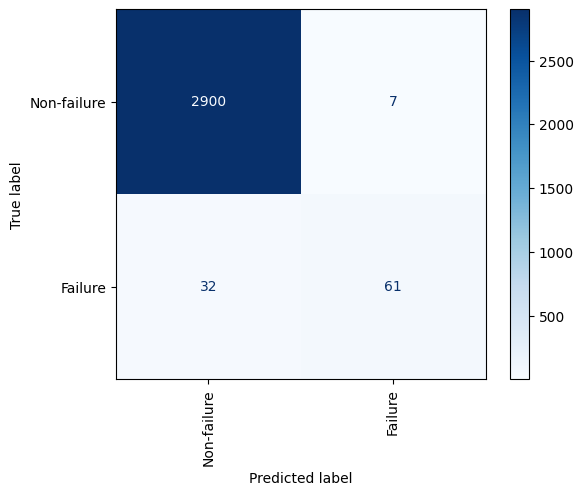

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
y_predicted = rf_model.predict(X_test) >= 1
labels = ['Non-failure','Failure']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')
plt.show()

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("\nEvaluating the Model...")
y_pred = rf_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Evaluating the Model...

Confusion Matrix:
[[2900    7]
 [  32   61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2907
           1       0.90      0.66      0.76        93

    accuracy                           0.99      3000
   macro avg       0.94      0.83      0.88      3000
weighted avg       0.99      0.99      0.99      3000


Accuracy Score:
0.987


In [10]:
print("\nFeature Importances:")
importances = pd.Series(rf_model.feature_importances_, index=df.columns[:-1])
print(importances.sort_values(ascending=False))


Feature Importances:
Torque [Nm]                0.305210
Rotational speed [rpm]     0.231352
Air temperature [K]        0.158216
Tool wear [min]            0.156265
Process temperature [K]    0.148956
dtype: float64


# GradientBoostingRegressor

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
 
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

y_pred = gbr_model.predict(X_test)

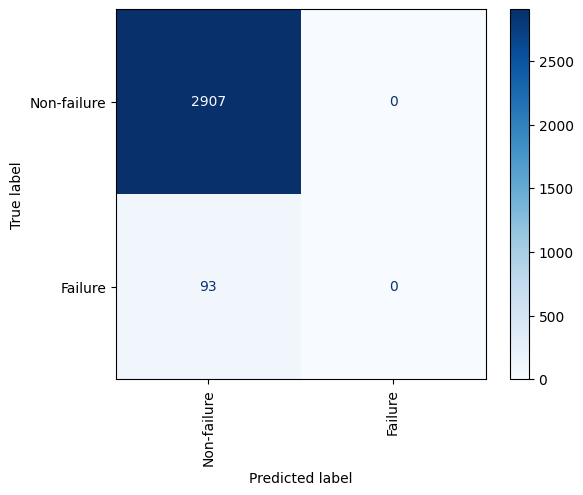

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
y_predicted = gbr_model.predict(X_test) == 1
labels = ['Non-failure','Failure']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')
plt.show()

# Neural Network

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=0)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential() 
model.add(Dense(1024, activation='relu', input_dim=5))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

c:\Users\Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │         6,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2048)           │     2,099,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,107,393 (8.04 MB)

 Trainable params: 2,107,393 (8.04 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=100)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8569 - loss: 74.3080 - val_accuracy: 0.9660 - val_loss: 11.1235
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9398 - loss: 7.4798 - val_accuracy: 0.9660 - val_loss: 7.8038
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9396 - loss: 5.4821 - val_accuracy: 0.9660 - val_loss: 1.0379
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9473 - loss: 0.6018 - val_accuracy: 0.9680 - val_loss: 0.3223
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9519 - loss: 0.2785 - val_accuracy: 0.8373 - val_loss: 0.3837
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9344 - loss: 0.8832 - val_accuracy: 0.9690 - val_loss: 0.1529
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9584 - loss: 0.1789 - val_accuracy: 0.9687 - val_loss: 0.1309
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9602 - loss: 0.1493 - val_accuracy: 0.9663 -

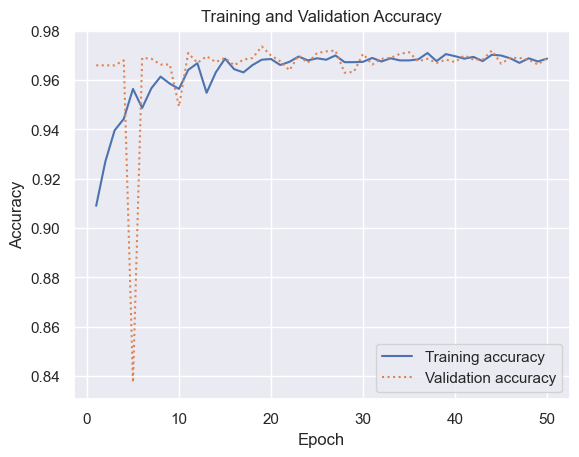

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()
plt.show()

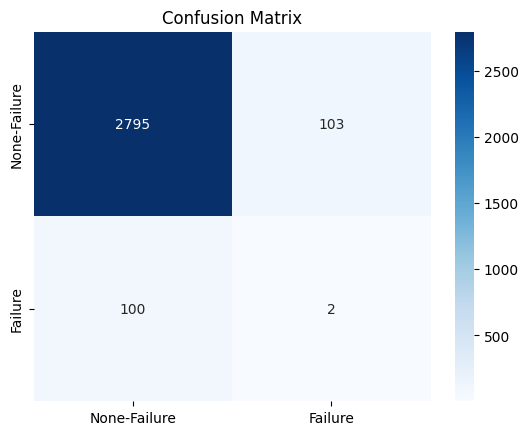

In [ ]:
sns.reset_orig()
y_predicted = model.predict(x_test) == 1
labels = ['Non-failure','Failure']
cmd.from_predictions(y_test, y_predicted, display_labels=labels, cmap='Blues', xticks_rotation='vertical')
plt.show()

# Discion tree


We start by importing the relevant pip for the discion tree

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

We defined earlier the data and seperated features and targets. We also have the scaled data for X. Hereunder the model for discion tree is sat up with Gini criterion.

In [20]:
dt_classifier=DecisionTreeClassifier(criterion='gini', random_state=42)
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

We can run the model evaluation

In [36]:
y_pred=dt_classifier.predict(x_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[2795  103]
 [ 100    2]]
Accuracy: 0.9323333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2898
           1       0.02      0.02      0.02       102

    accuracy                           0.93      3000
   macro avg       0.49      0.49      0.49      3000
weighted avg       0.93      0.93      0.93      3000



The Confusion Matrix will be defined

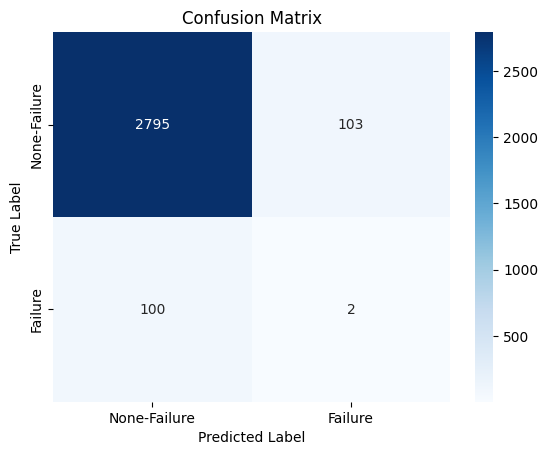

In [42]:
cm = confusion_matrix(y_test, y_pred)
labels = ["None-Failure", "Failure"]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Neural Network

The importance of feature is defined hereunder


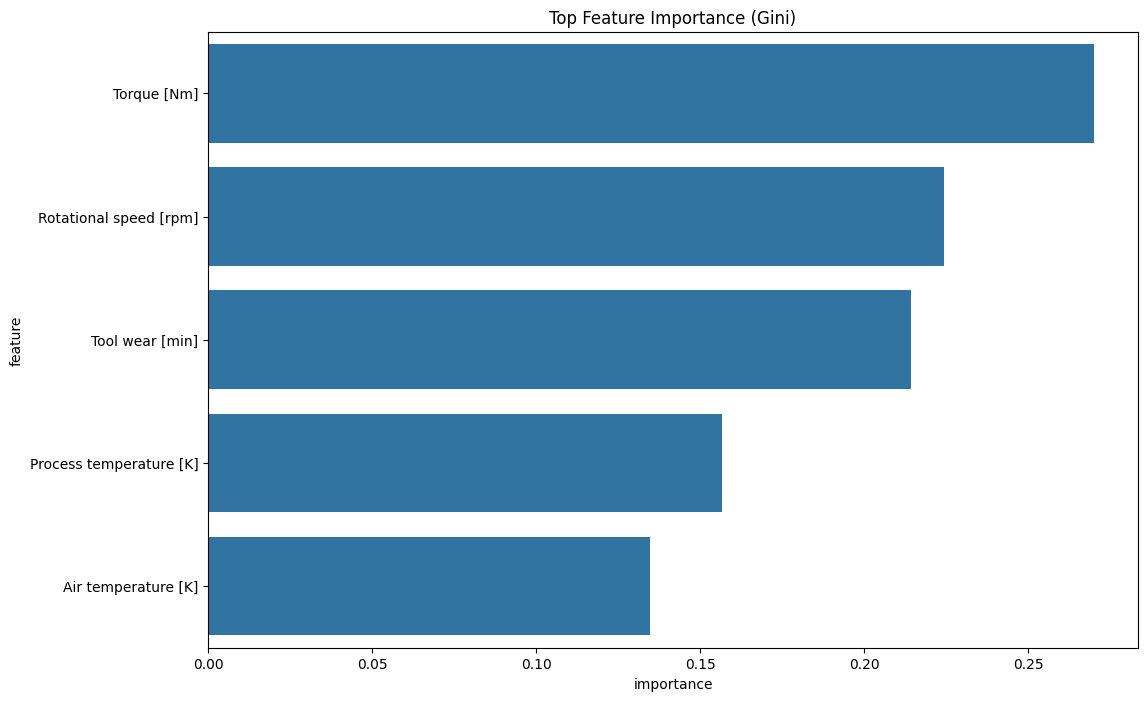

In [30]:
feature_importance = dt_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'feature': x.columns, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(5))
plt.title('Top Feature Importance (Gini)')
plt.show()